This data comes from https://statswales.gov.wales/Catalogue/Community-Safety-and-Social-Inclusion/Welsh-Index-of-Multiple-Deprivation/WIMD-Indicator-Data-By-Age/incomedeprivation

In [1]:
import numpy as np
import pandas as pd

In [2]:
lsoa_name_to_code_dict = np.load('lsoa_name_to_code_dict.npy').item(0)

In [3]:
file = 'income_deprivation.csv'
data = pd.read_csv(file,skiprows=8)
data = data.drop(0)
data['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), data['Unnamed: 0']))
data = data.drop(columns = ["Unnamed: 0"])
data = data.drop(data.index[1909:])
data = data.rename(columns={'.':'All Ages'})
data['LSOA Code'] = list(map(lambda lsoa_name : lsoa_name_to_code_dict[lsoa_name], data['LSOA name']))
data = data.set_index('LSOA Code')
data['0 - 15 '] = list(map(lambda entry : float(entry), data['0 - 15 ']))

In [4]:
grangetown_codes = ['W01001759','W01001760','W01001761','W01001762','W01001764','W01001765',\
                    'W01001766','W01001767','W01001768','W01001946']
canton_codes = ['W01001709', 'W01001710', 'W01001711', 'W01001712', 'W01001713', 'W01001714',\
                'W01001715', 'W01001716', 'W01001717'] 
riverside_codes = ['W01001855', 'W01001856', 'W01001857', 'W01001862']
lsoa_codes = np.concatenate([grangetown_codes, canton_codes, riverside_codes]) 


south_grangetown=['W01001945','W01001947']
north_riverside = ['W01001858', 'W01001859', 'W01001860','W01001861']

In [5]:
data['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), data.index.values))

In [32]:
def plot_two_data_sets(stat,data,stat2=None,kind='bar',figsize=(15,7),percentile=10.0): 
    if kind == 'bar':
        percentile/=100.
        order = data[stat].dropna().sort_values().keys()
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                                                             axis=1,keys=['local','non-local'])
        if percentile>0:
            lnl_data.set_index(lnl_data.index.values).loc[order[-int(len(data)*percentile):]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[-int(len(data)*percentile):] if data['local'][code]==True ]
        else:
            lnl_data.set_index(lnl_data.index.values).loc[order[:-int(len(data)*percentile)]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[:-int(len(data)*percentile)] if data['local'][code]==True ]

    elif kind == 'scatter':
        data.plot.scatter(x=stat, y=stat2,c='local',colormap='viridis',figsize=figsize)
    else:
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                             axis=1,keys=['local','non-local'])
        lnl_data.plot(kind=kind,title=stat,figsize=figsize)


In [7]:
top_1pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0 - 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=1.0)

In [8]:
top_1pc_count = {}
for key in top_1pc_local.keys():
    top_1pc_count[key] = len(top_1pc_local[key])
top_1pc_count

{'0 - 4 ': 0,
 '10 - 15 ': 0,
 '16 - 18 ': 1,
 '19 - 24 ': 0,
 '25 - 34 ': 0,
 '35 - 44 ': 0,
 '45 - 54 ': 1,
 '5 - 9 ': 0,
 '55 - 64 ': 3,
 '65 - 74 ': 5,
 '75+ ': 2,
 'All Ages': 0}

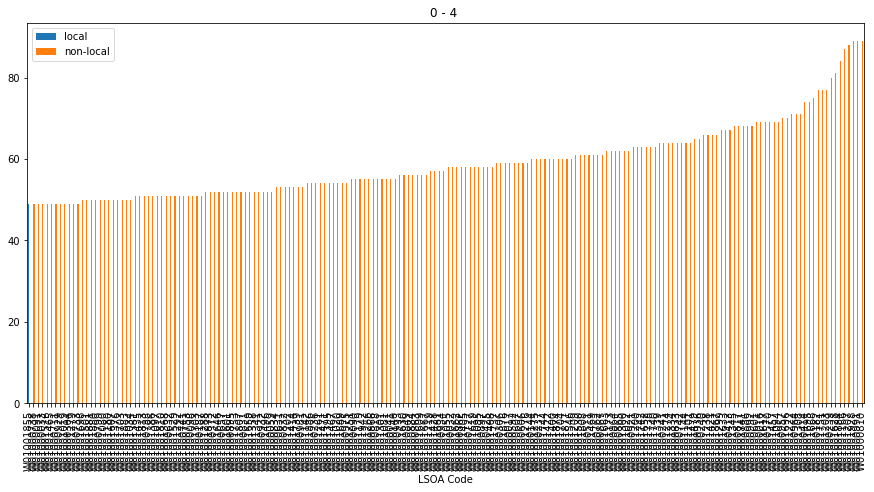

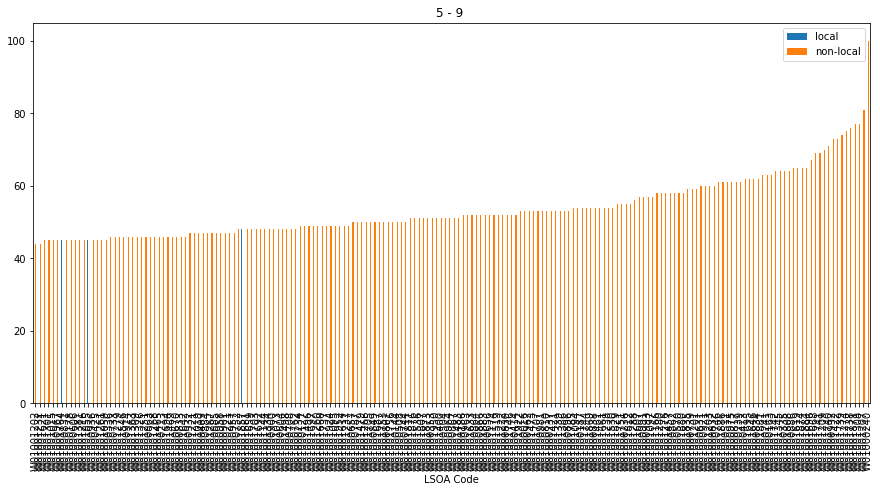

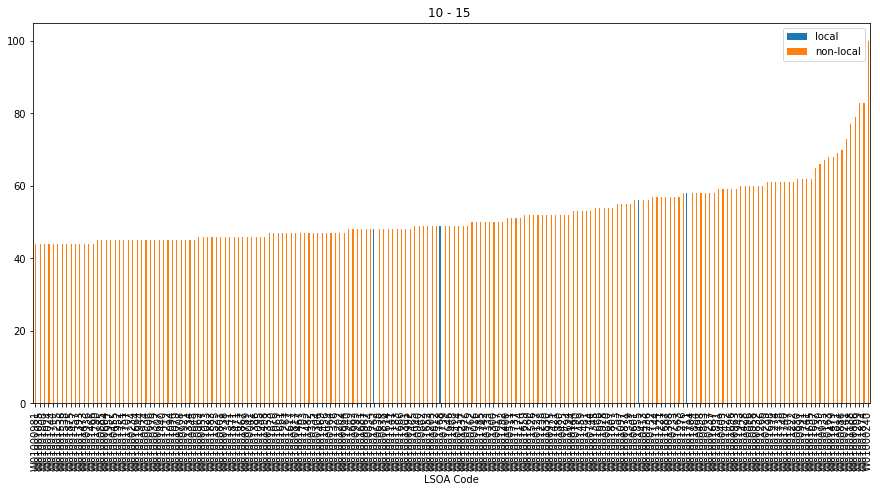

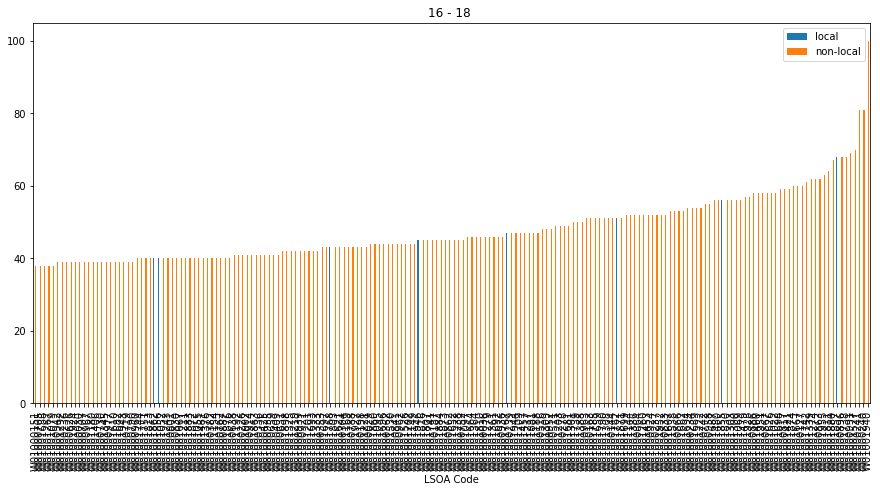

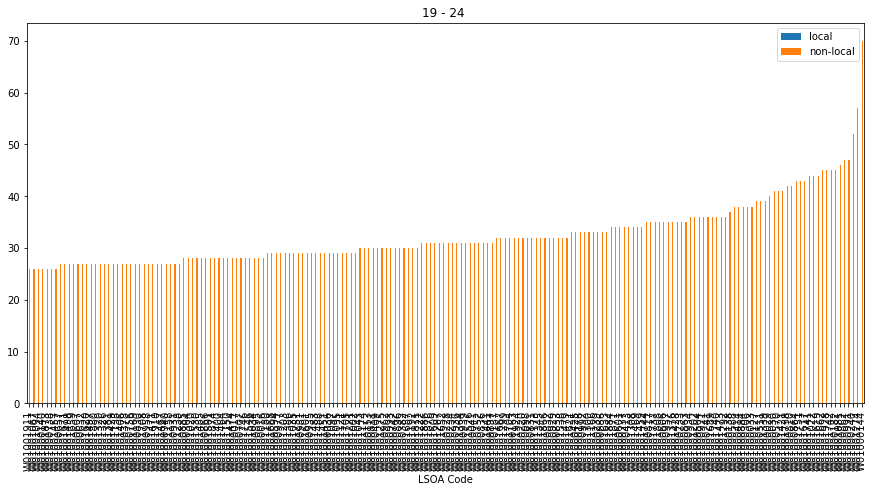

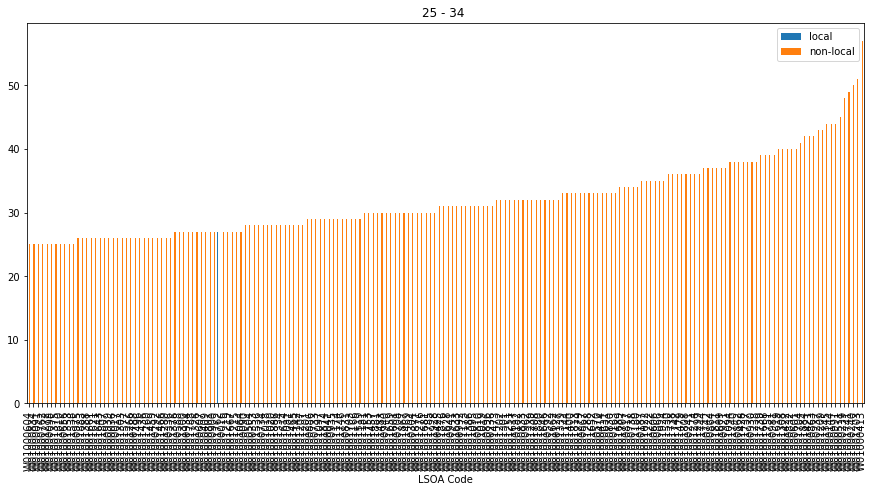

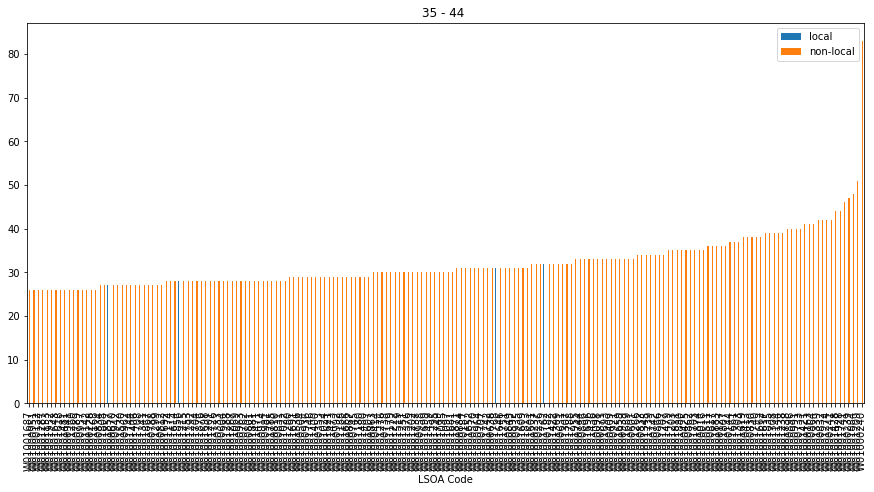

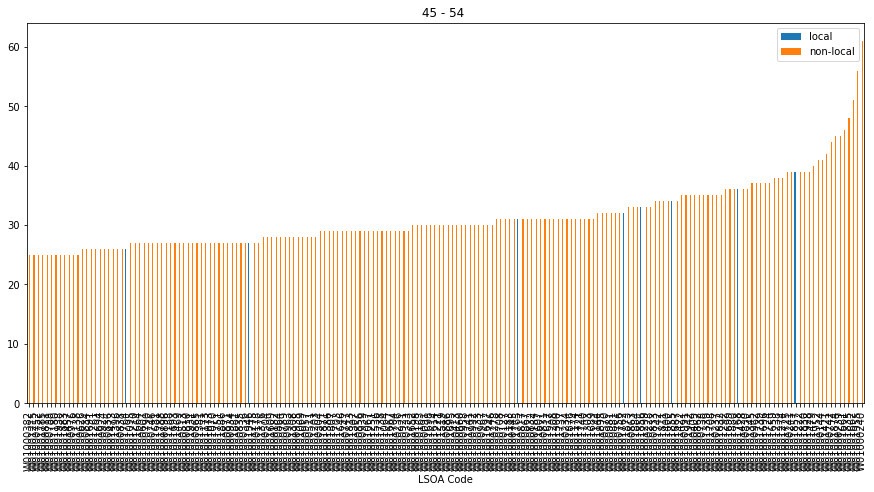

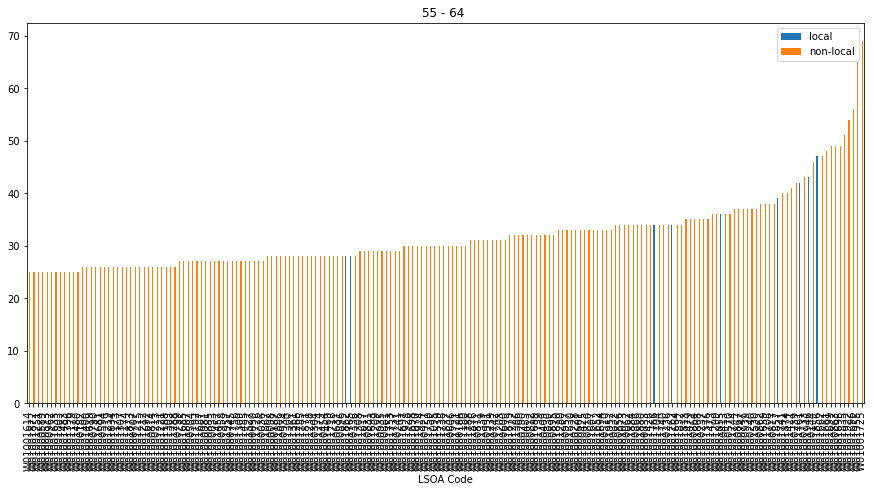

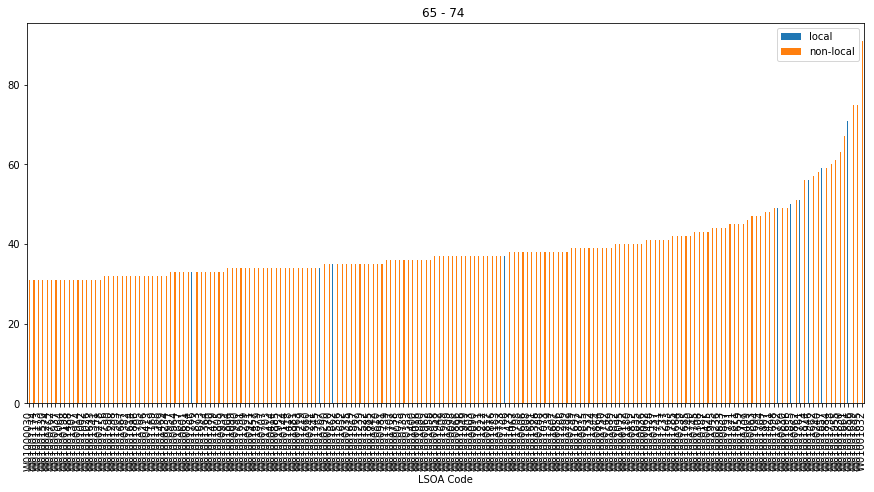

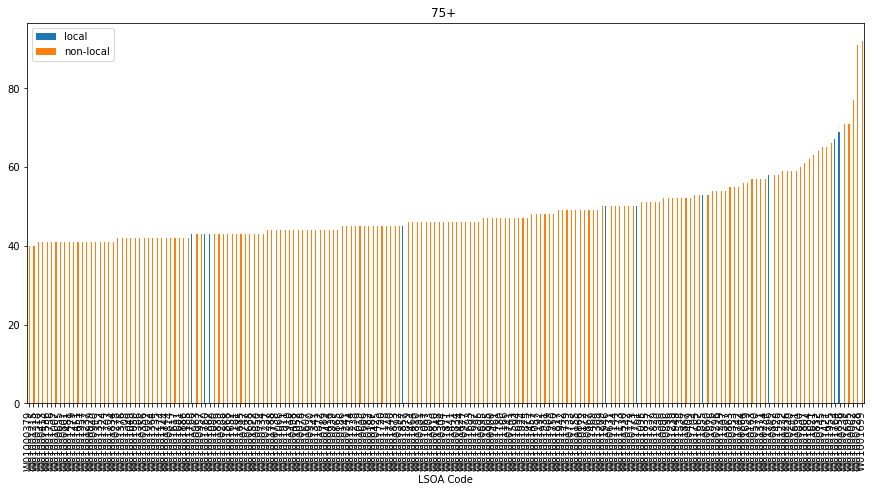

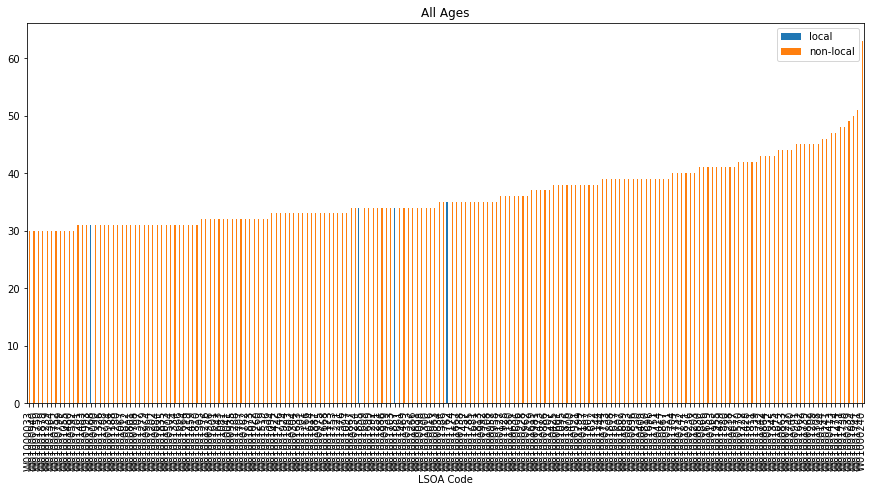

In [9]:
top_10pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0 - 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=10.0)

In [10]:
top_10pc_count = {}
for key in top_1pc_local.keys():
    top_10pc_count[key] = len(top_10pc_local[key])
top_10pc_count

{'0 - 4 ': 1,
 '10 - 15 ': 4,
 '16 - 18 ': 8,
 '19 - 24 ': 0,
 '25 - 34 ': 1,
 '35 - 44 ': 4,
 '45 - 54 ': 8,
 '5 - 9 ': 3,
 '55 - 64 ': 9,
 '65 - 74 ': 10,
 '75+ ': 10,
 'All Ages': 4}

In [11]:
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')

In [12]:
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
0 - 4,1,0
5 - 9,3,0
10 - 15,4,0
16 - 18,8,1
19 - 24,0,0
25 - 34,1,0
35 - 44,4,0
45 - 54,8,1
55 - 64,9,3


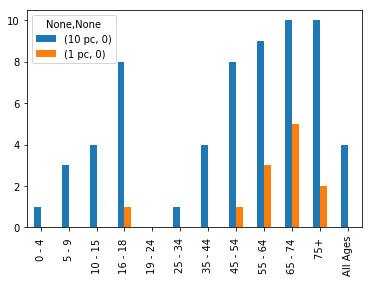

In [13]:
top_1_10_pc_df.plot(kind='bar')

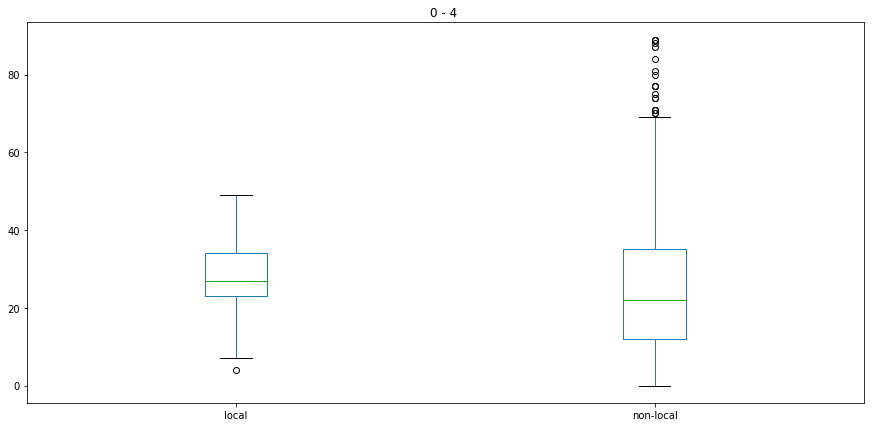

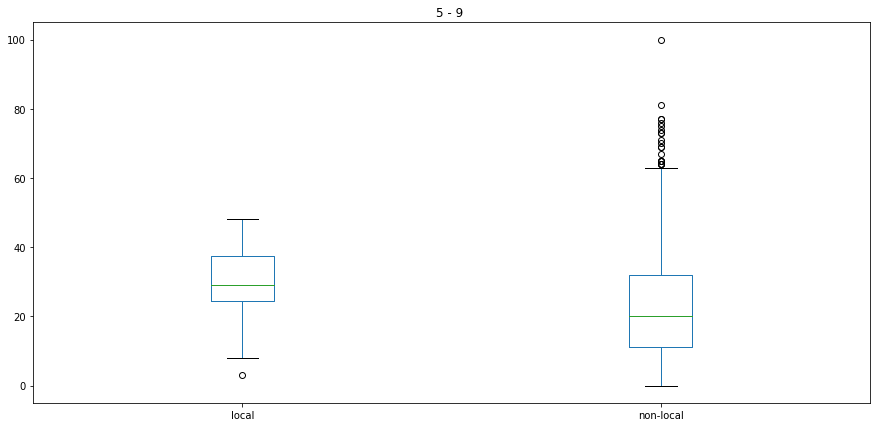

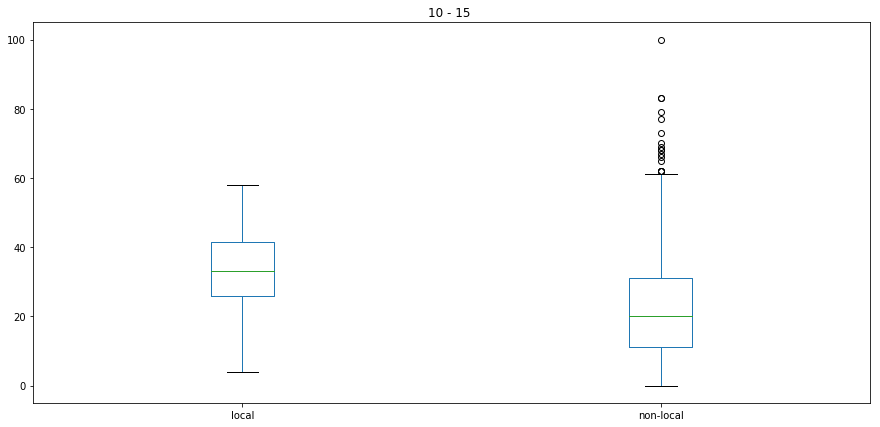

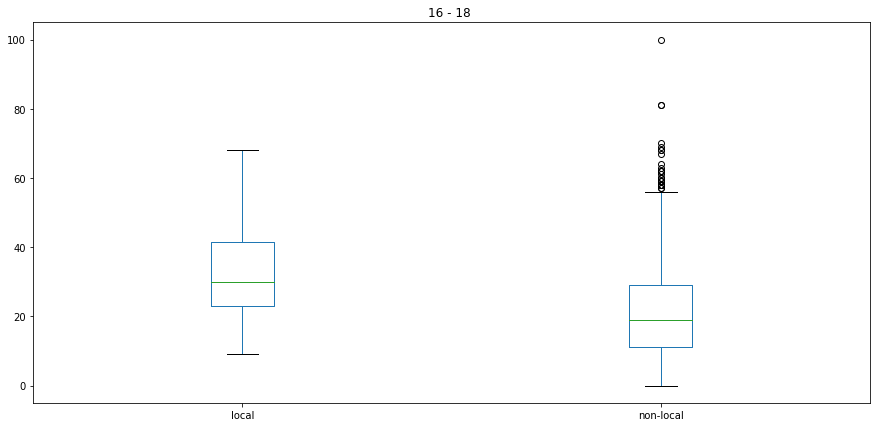

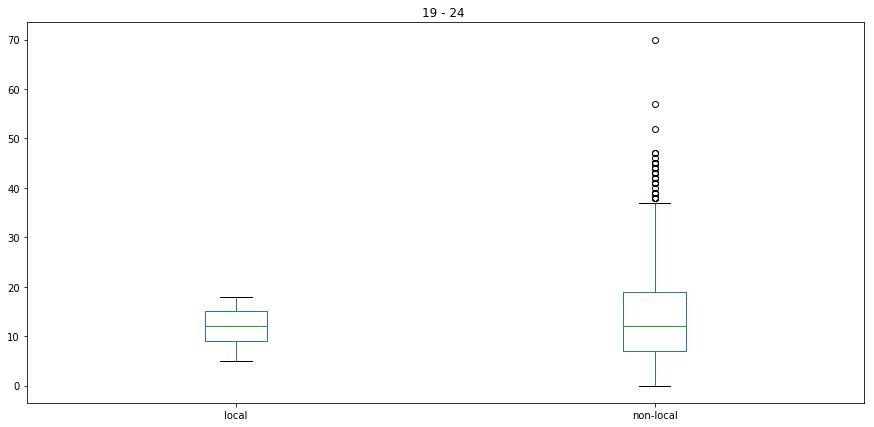

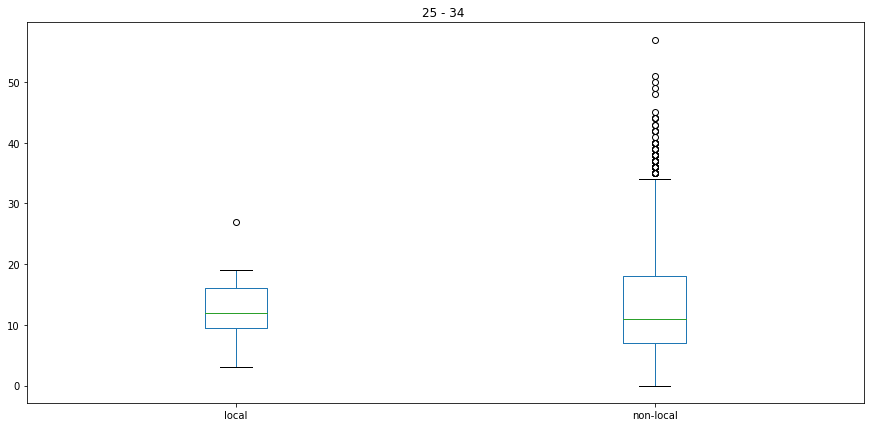

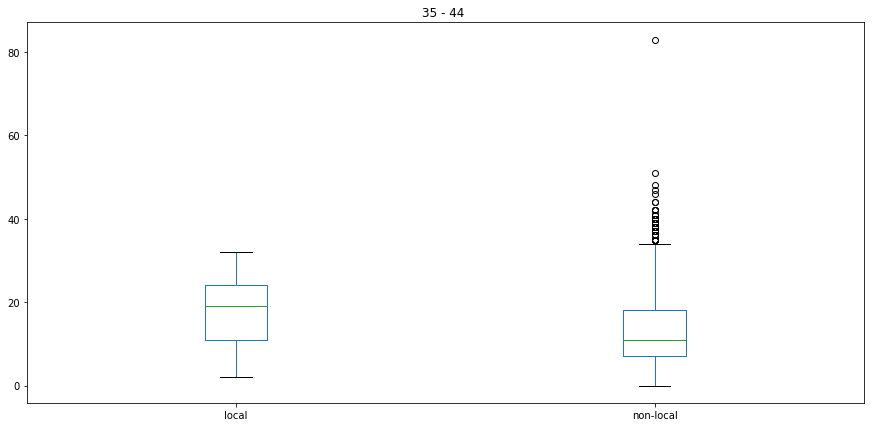

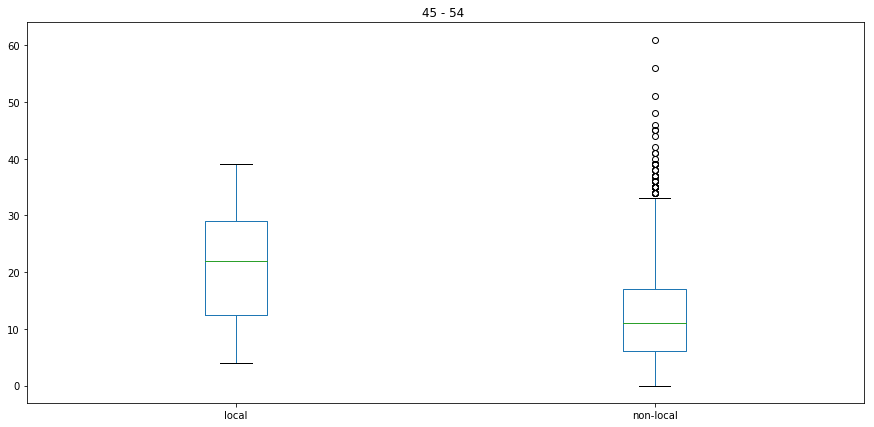

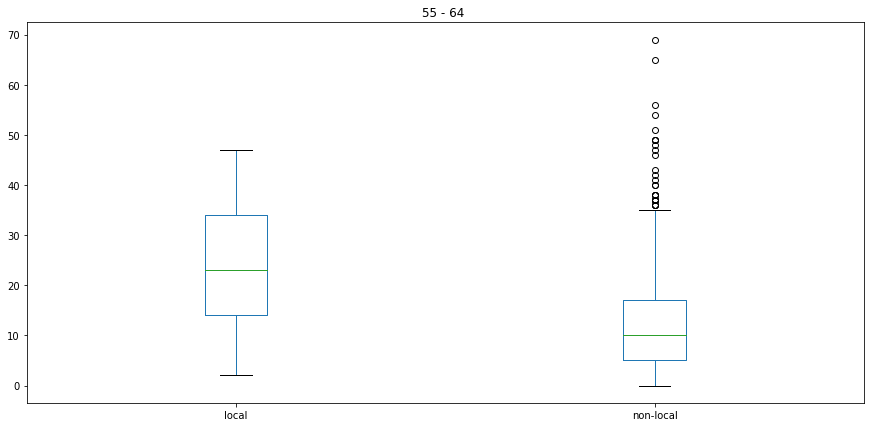

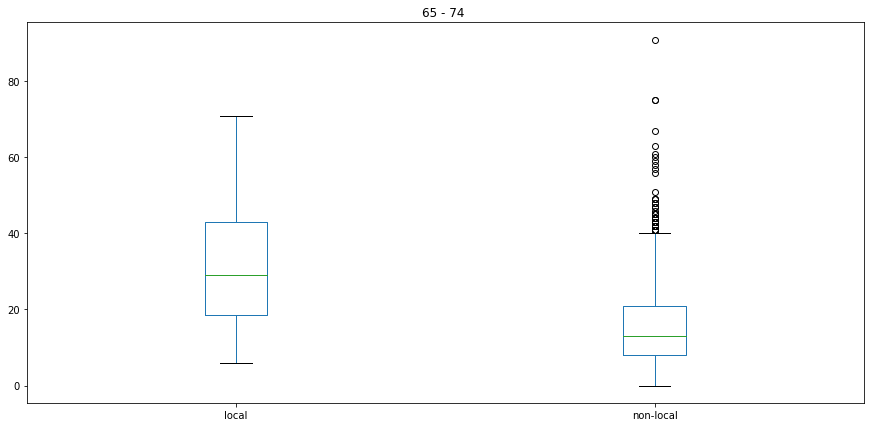

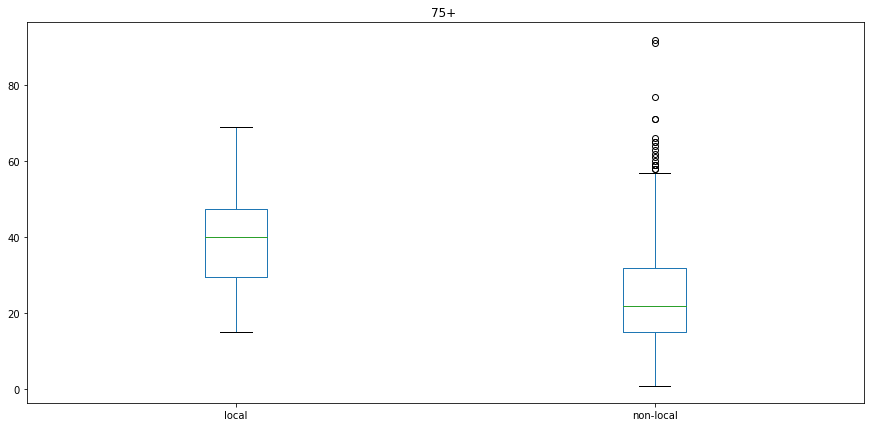

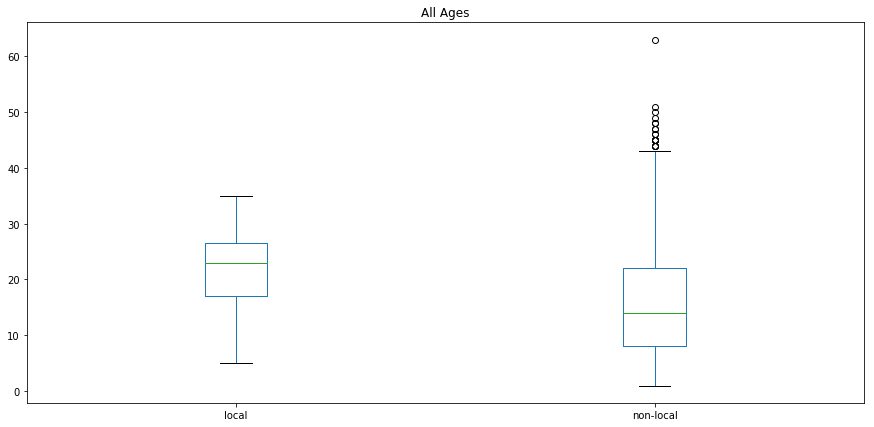

In [14]:
for stat in data.drop(columns=['LSOA name', 'local','0 - 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    plot_two_data_sets(stat=stat,data=data,kind='box')

Now we will look at the total number of people with no central heating, rather than a percentage. To do this we use the age data which gives the number of people in each age group in each LSOA.

In [15]:
lsoa_name_to_code_dict = np.load("/Users/iain/Documents/SRCDC_cardiff_data_analysis/codes/age/name_to_code_dict.npy").item(0)
file = '/Users/iain/Documents/SRCDC_cardiff_data_analysis/codes/age/age.xlsx'
ages = pd.read_excel(file,skiprows=1)
ages = ages.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
ages = ages.drop([0,1,2,3])
ages = ages.rename(columns={'Unnamed: 8': 'Total','Unnamed: 4': 'LSOA name'})
ages = ages.rename(columns={'Aged 0 to 15 ': '0 - 15 ', 'Aged 16 to 64 ': '16 - 64 ', 'Aged over 65 ': '65+ ',\
                           'Total': 'All Ages'})
ages = ages.dropna()
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), ages['LSOA name']))
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.replace("Rhydfelen Central / Llan ",\
                                                                   "Rhydfelen Central/Ilan "), ages['LSOA name']))
ages['LSOA code'] =  list(map(lambda lsoa_name : lsoa_name_to_code_dict[lsoa_name], ages['LSOA name']))
ages = ages.set_index('LSOA code')
ages = ages.drop(columns=['LSOA name']) 
ages['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), ages.index.values))

In [21]:
data_num_ppl = ages/100 * data.drop(columns=['0 - 18 ','0 - 4 ', '5 - 9 ',\
       '10 - 15 ', '16 - 18 ', '19 - 24 ', '25 - 34 ', '35 - 44 ', '45 - 54 ',\
       '55 - 64 ', '65 - 74 ', '75+ ','LSOA name'])
data_num_ppl['local']*=100

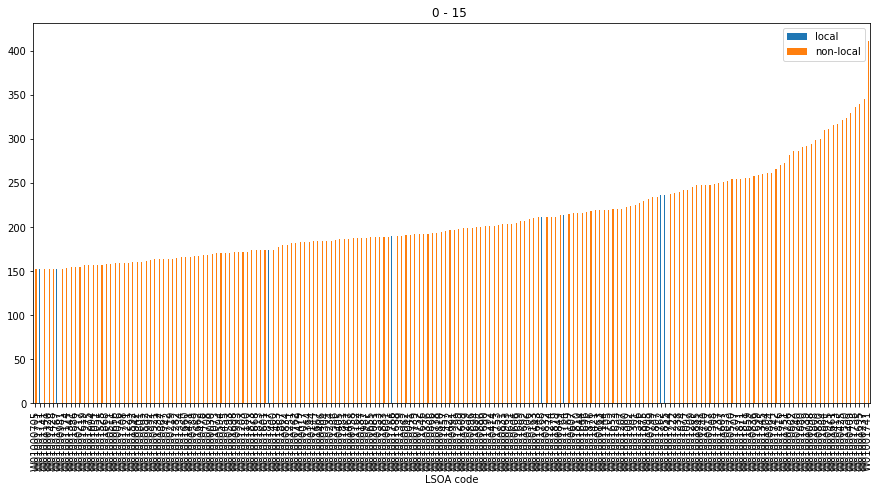

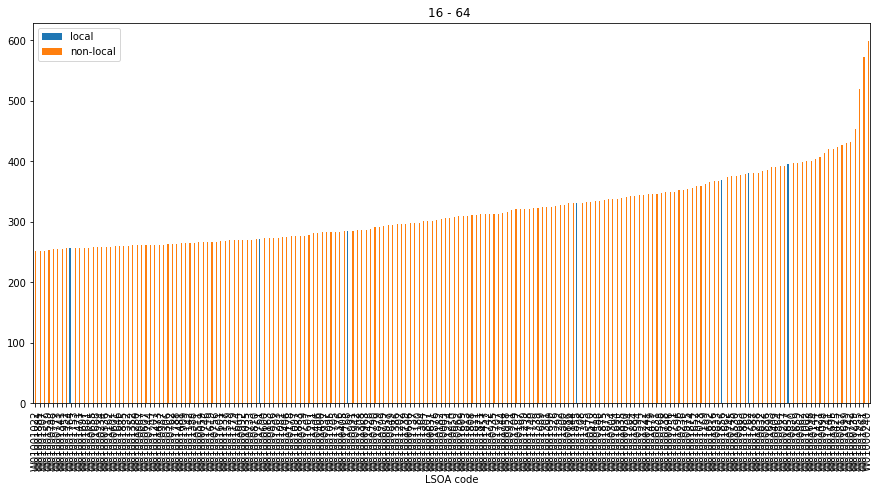

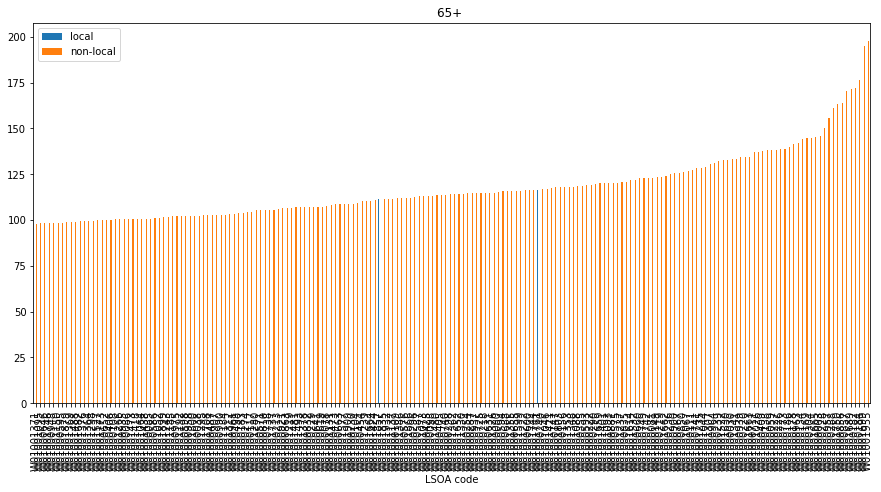

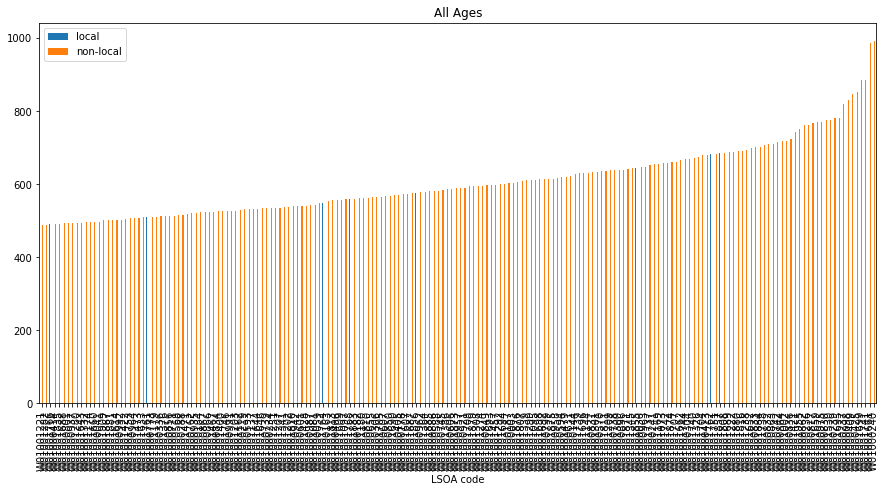

In [22]:
top_10pc_local = {}
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=10.0)

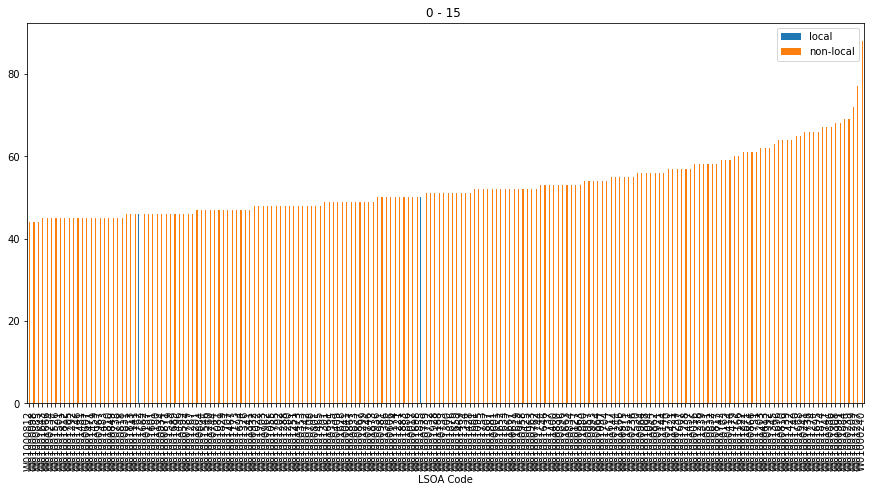

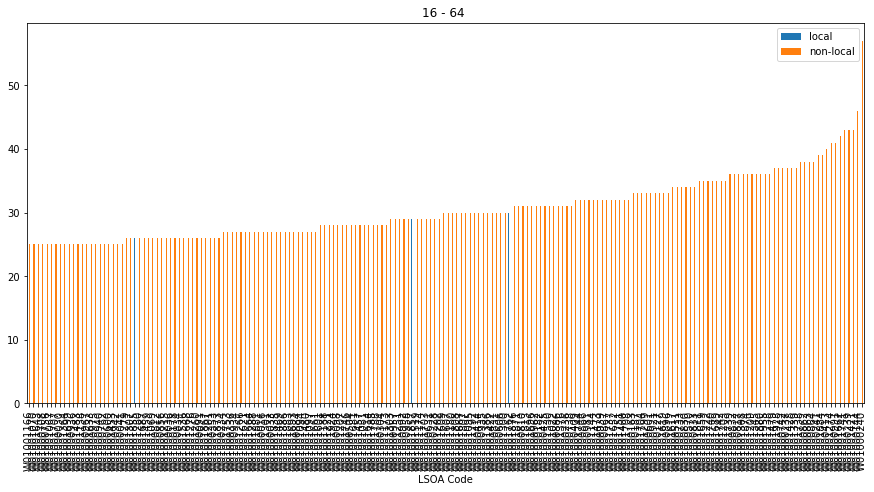

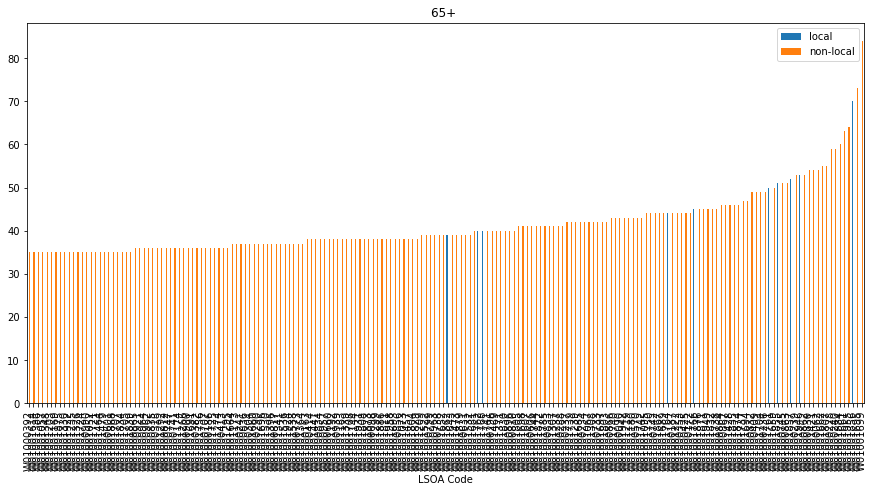

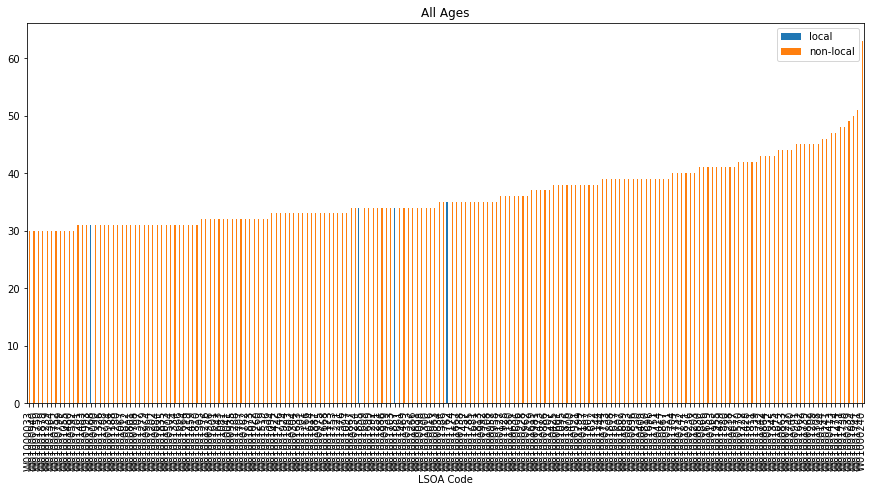

In [23]:
top_10pc_local = {}
for stat in data_num_ppl.drop(columns = ['local']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=10.0)

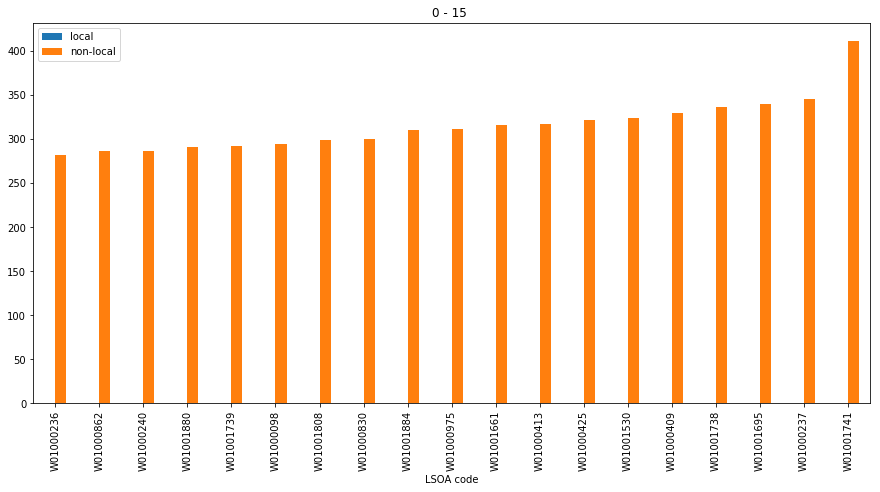

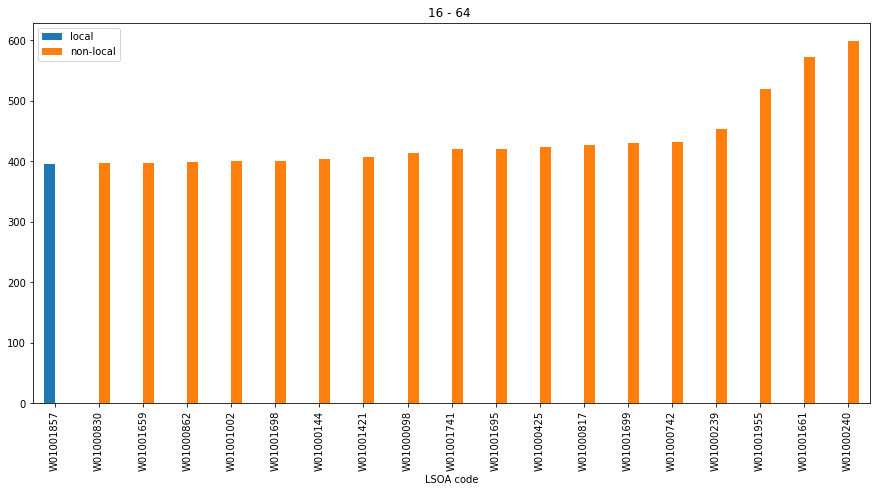

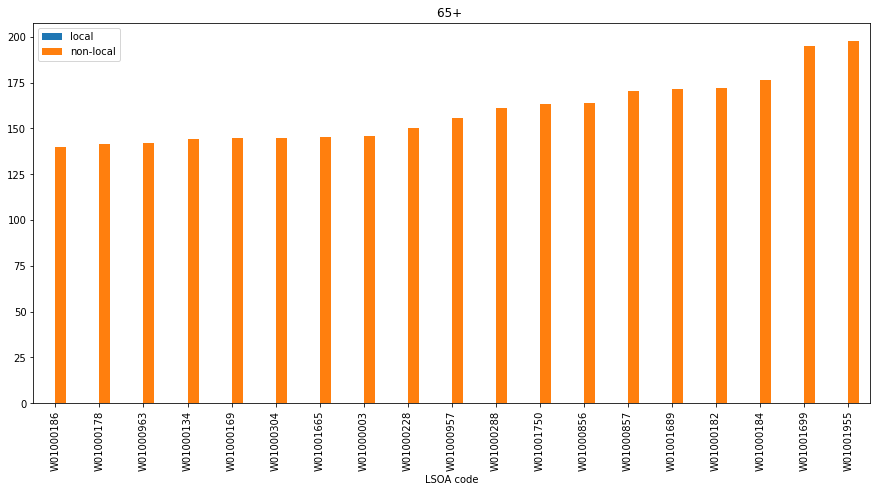

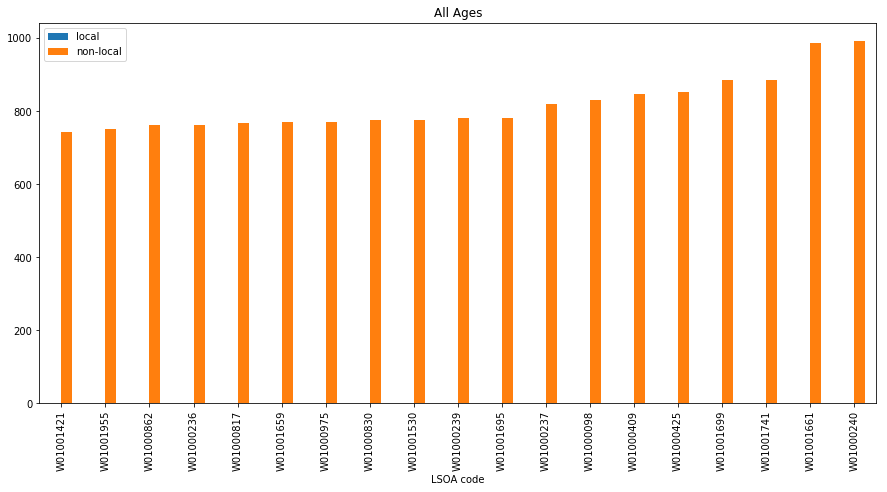

In [30]:
top_1pc_local = {}
for stat in data_num_ppl.drop(columns = ['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=1.0)

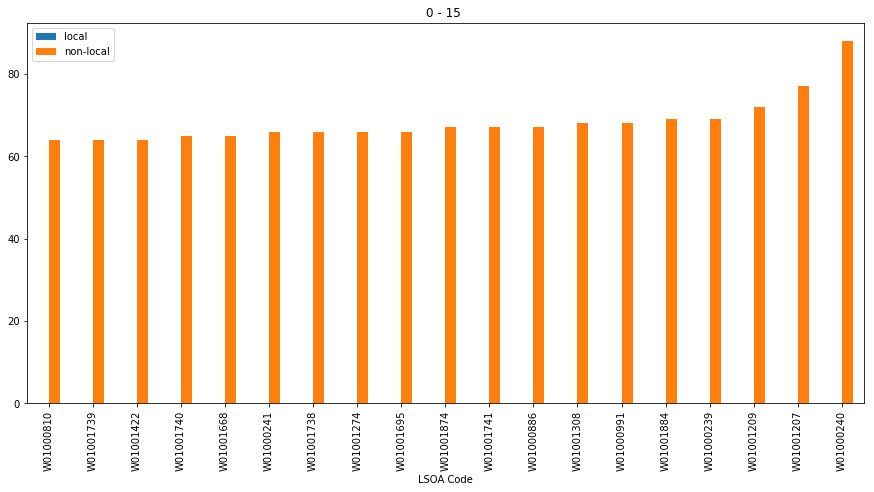

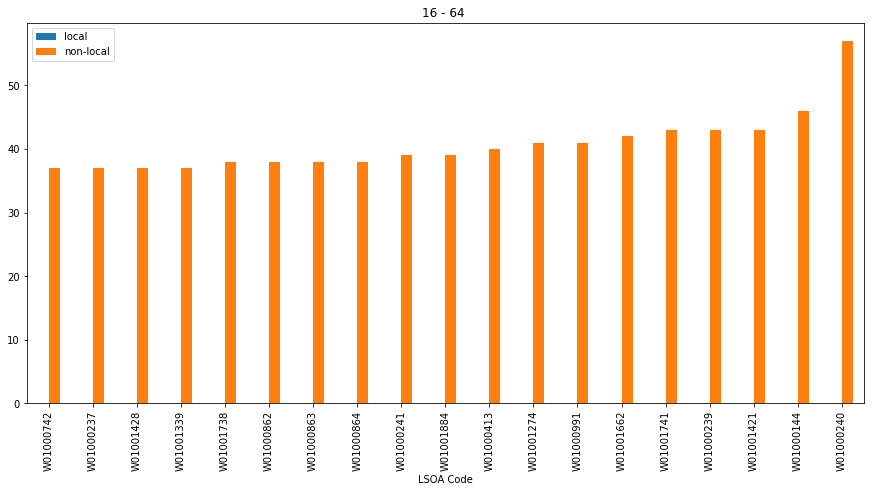

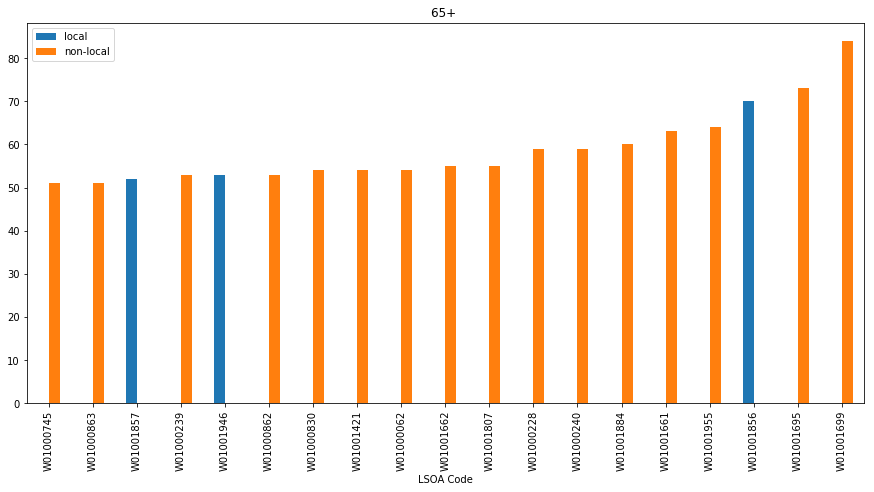

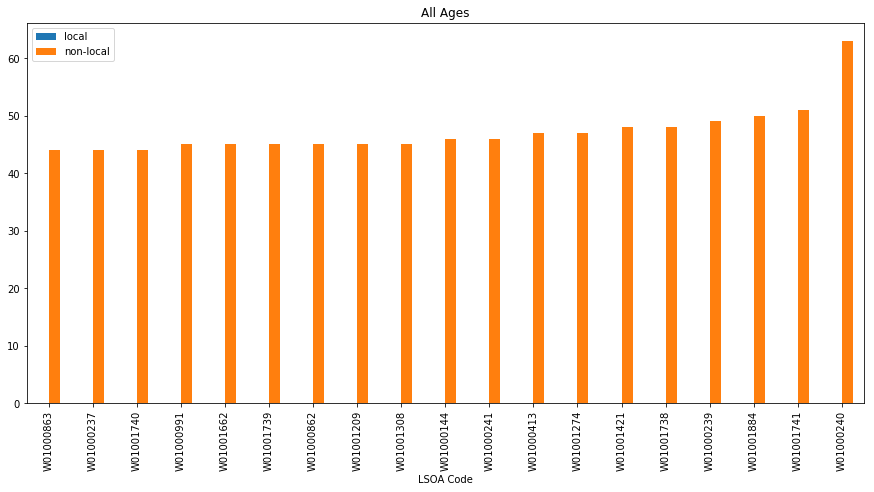

In [31]:
top_1pc_local = {}
for stat in data_num_ppl.drop(columns = ['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=1.0)

In [25]:
top_10pc_count = {key : len(top_10pc_local[key]) for key in top_10pc_local.keys()}
top_1pc_count = {key : len(top_1pc_local[key]) for key in top_1pc_local.keys()}

In [26]:
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')

In [27]:
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
0 - 15,2,0
16 - 64,3,0
65+,10,3
All Ages,4,0


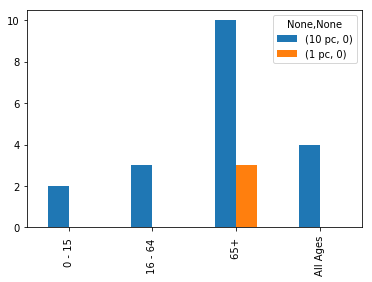

In [28]:
top_1_10_pc_df.plot(kind='bar')

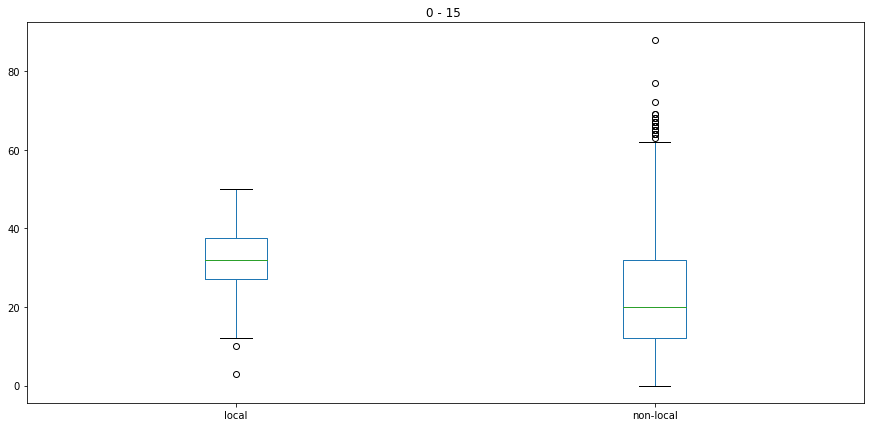

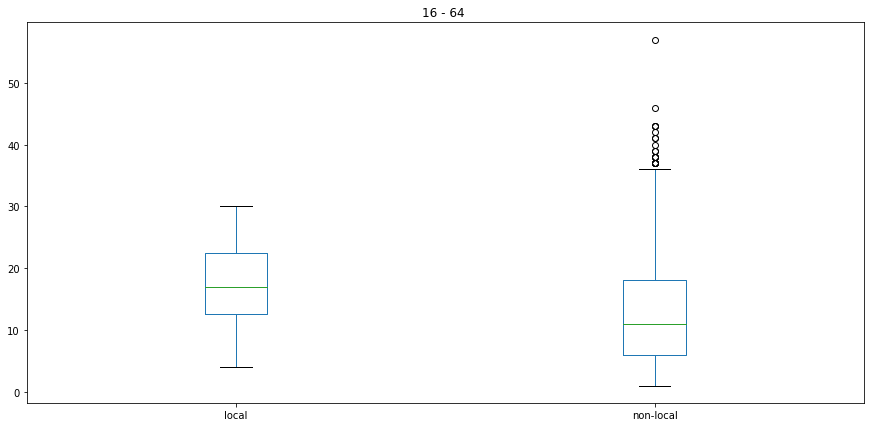

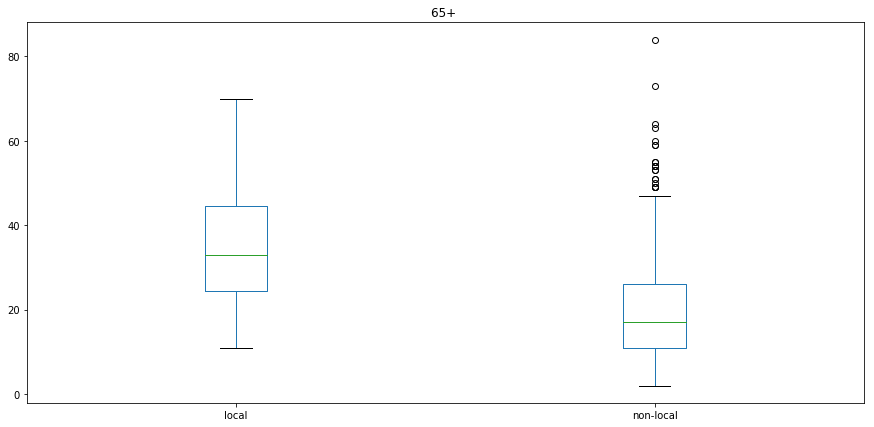

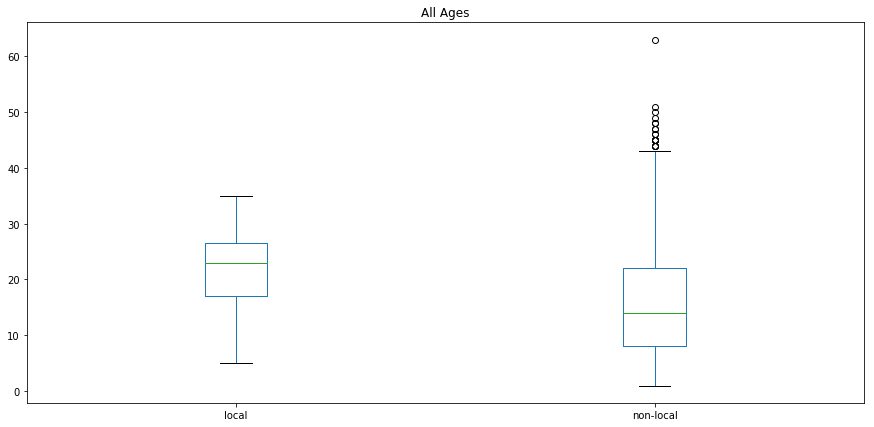

In [29]:
for stat in data_num_ppl.drop(columns = ['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='box')

In [ ]:
len(lsoa_codes)